In [33]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [35]:
data = pd.read_csv('data/Apple_stock.csv', header=0, sep = ", ")


/var/folders/pl/cdtxfpj90yv22wr7bnk7kyxh0000gn/T/ipykernel_73688/3459150121.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data/Apple_stock.csv', header=0, sep = ", ")


In [37]:
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23


In [39]:
data['Close/Last'].describe()

count       2518
unique      2417
top       $97.34
freq           3
Name: Close/Last, dtype: object

In [41]:
data.columns

Index(['Date', 'Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [43]:
data['Close/Last'].rename("Close")

0        $273.36
1        $273.52
2        $292.65
3        $288.08
4        $298.18
          ...   
2513    $31.2786
2514    $30.1014
2515    $29.9043
2516    $29.8357
2517    $29.8557
Name: Close, Length: 2518, dtype: object

In [45]:
data = data.rename(columns = {"Close/Last": "Close"})
data = data.rename(str.lower, axis = 'columns')

In [47]:
for field in ['close', 'open', 'high', 'low']:
    data[field] = data[field].str.replace("$", "")

In [49]:
data

,date,close,volume,open,high,low
0,02/28/2020,273.36,106721200,257.26,278.41,256.37
1,02/27/2020,273.52,80151380,281.1,286,272.96
2,02/26/2020,292.65,49678430,286.53,297.88,286.5
3,02/25/2020,288.08,57668360,300.95,302.53,286.13
4,02/24/2020,298.18,55548830,297.26,304.18,289.23
...,...,...,...,...,...,...
2513,03/05/2010,31.2786,224647427,30.7057,31.3857,30.6614
2514,03/04/2010,30.1014,89591907,29.8971,30.1314,29.8043
2515,03/03/2010,29.9043,92846488,29.8486,29.9814,29.7057
2516,03/02/2010,29.8357,141486282,29.99,30.1186,29.6771


In [51]:
for each in ['close', 'volume', 'open', 'high', 'low']:
    data[each] = data[each].astype(float)

In [53]:
data['close'].dtype

dtype('float64')

In [55]:
pd.to_datetime('02/28/2020', format='%m/%d/%Y')

Timestamp('2020-02-28 00:00:00')

In [57]:
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')

In [59]:
data

,date,close,volume,open,high,low
0,2020-02-28,273.3600,106721200.0,257.2600,278.4100,256.3700
1,2020-02-27,273.5200,80151380.0,281.1000,286.0000,272.9600
2,2020-02-26,292.6500,49678430.0,286.5300,297.8800,286.5000
3,2020-02-25,288.0800,57668360.0,300.9500,302.5300,286.1300
4,2020-02-24,298.1800,55548830.0,297.2600,304.1800,289.2300
...,...,...,...,...,...,...
2513,2010-03-05,31.2786,224647427.0,30.7057,31.3857,30.6614
2514,2010-03-04,30.1014,89591907.0,29.8971,30.1314,29.8043
2515,2010-03-03,29.9043,92846488.0,29.8486,29.9814,29.7057
2516,2010-03-02,29.8357,141486282.0,29.9900,30.1186,29.6771


In [61]:
data['date'].dtype

dtype('<M8[ns]')

In [63]:
data = data.sort_values('date')

In [65]:


data

,date,close,volume,open,high,low
2517,2010-03-01,29.8557,137312041.0,29.3928,29.9286,29.3500
2516,2010-03-02,29.8357,141486282.0,29.9900,30.1186,29.6771
2515,2010-03-03,29.9043,92846488.0,29.8486,29.9814,29.7057
2514,2010-03-04,30.1014,89591907.0,29.8971,30.1314,29.8043
2513,2010-03-05,31.2786,224647427.0,30.7057,31.3857,30.6614
...,...,...,...,...,...,...
4,2020-02-24,298.1800,55548830.0,297.2600,304.1800,289.2300
3,2020-02-25,288.0800,57668360.0,300.9500,302.5300,286.1300
2,2020-02-26,292.6500,49678430.0,286.5300,297.8800,286.5000
1,2020-02-27,273.5200,80151380.0,281.1000,286.0000,272.9600


In [67]:
scaler = MinMaxScaler()
data['close_norm'] = scaler.fit_transform(data['close'].to_numpy().reshape(-1,1))

In [69]:
data

,date,close,volume,open,high,low,close_norm
2517,2010-03-01,29.8557,137312041.0,29.3928,29.9286,29.3500,0.000067
2516,2010-03-02,29.8357,141486282.0,29.9900,30.1186,29.6771,0.000000
2515,2010-03-03,29.9043,92846488.0,29.8486,29.9814,29.7057,0.000231
2514,2010-03-04,30.1014,89591907.0,29.8971,30.1314,29.8043,0.000894
2513,2010-03-05,31.2786,224647427.0,30.7057,31.3857,30.6614,0.004852
...,...,...,...,...,...,...,...
4,2020-02-24,298.1800,55548830.0,297.2600,304.1800,289.2300,0.902409
3,2020-02-25,288.0800,57668360.0,300.9500,302.5300,286.1300,0.868444
2,2020-02-26,292.6500,49678430.0,286.5300,297.8800,286.5000,0.883813
1,2020-02-27,273.5200,80151380.0,281.1000,286.0000,272.9600,0.819481


In [71]:
X = []
y = []
days = 30

for i in range(len(data) - days):
    X.append(data.iloc[i:i+days]['close_norm'].tolist())
    y.append(data.iloc[i+days]['close_norm'])


In [73]:
class ManualLSTM():
    def __init__(self, input_size, hidden_size):
        self.learning_rate = 0.01
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.W_xf = torch.randn( input_size, hidden_size, requires_grad=True, device = device)
        self.W_xi = torch.randn( input_size, hidden_size, requires_grad=True, device = device) 
        self.W_xg = torch.randn( input_size, hidden_size, requires_grad=True, device = device)
        self.W_xo = torch.randn( input_size, hidden_size, requires_grad=True, device = device)
        self.W_hf = torch.randn(hidden_size, hidden_size, requires_grad=True, device = device)
        self.W_hi = torch.randn(hidden_size, hidden_size, requires_grad=True, device = device)
        self.W_hg = torch.randn(hidden_size, hidden_size, requires_grad=True, device = device)
        self.W_ho = torch.randn(hidden_size, hidden_size, requires_grad=True, device = device)

        self.b_f = torch.randn(hidden_size, requires_grad=True, device = device)
        self.b_i = torch.randn(hidden_size, requires_grad=True, device = device)
        self.b_g = torch.randn(hidden_size, requires_grad=True, device = device)
        self.b_o = torch.randn(hidden_size, requires_grad=True, device = device)

        output_size = 1
        self.W_out = torch.randn(hidden_size, output_size, requires_grad=True, device = device)
        self.b_out = torch.randn(output_size, requires_grad=True, device = device)
    
    def forward(self, x_t_seq):
        
        h_t = torch.zeros(1, self.hidden_size, device= device)
        c_t = torch.zeros(1, self.hidden_size, device= device)
        
    
        for t in range(len(x_t_seq)):                 # Loop over time steps
            x_t = x_t_seq[t].unsqueeze(0)         # Shape: (1, input_size)
        
            f_t = torch.sigmoid(x_t @ self.W_xf + h_t @ self.W_hf + self.b_f)
            i_t = torch.sigmoid(x_t @ self.W_xi + h_t @ self.W_hi + self.b_i)
            g_t = torch.tanh(   x_t @ self.W_xg + h_t @ self.W_hg + self.b_g)
            o_t = torch.sigmoid(x_t @ self.W_xo + h_t @ self.W_ho + self.b_o)

            c_t = f_t * c_t + i_t * g_t
            h_t = o_t * torch.tanh(c_t)
        return h_t @ self.W_out + self.b_out
    
    def step(self):
        with torch.no_grad():
            for params in [self.W_xf, self.W_xi, self.W_xg, self.W_xo,
                            self.W_hf, self.W_hi, self.W_hg, self.W_ho,
                            self.b_f, self.b_i, self.b_g, self.b_o,
                            self.W_out, self.b_out]:
                
                params -= self.learning_rate * params.grad
                params.grad.zero_()
                
    def save(self, filename):
        torch.save(self.__dict__, filename)
    
    def load(self, filename):
        state = torch.load(filename, map_location = device)
        self.__dict__.update(state)
    
    
        

In [75]:
X = np.array(X)
y = np.array(y)

X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # (batch, seq_len, 1)
Y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)   # (batch, 1)

batch_size, seq_size, input_size =  X_tensor.shape

In [77]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [79]:
model = ManualLSTM(input_size = input_size, hidden_size = 5)

In [81]:
loss_fn = nn.MSELoss()

learning_rate = 0.01
epochs = 30

for n in range(epochs):
    total_loss = 0.0
    for i in range(batch_size):                    # Loop over samples
        x_t_seq = X_tensor[i]                     # Shape: (seq_len, input_size)
        
        
        
        y_pred = model.forward(x_t_seq)
        y_true = Y_tensor[i].view(1,1)
    
        loss = loss_fn(y_pred, y_true)
    
        total_loss += loss
    
        loss.backward()
        
        model.step()
            
    
    
    print(f"Epochs {n}: Total Loss = {total_loss:.6f}")

Epochs 0: Total Loss = 0.312908
Epochs 1: Total Loss = 0.311967
Epochs 2: Total Loss = 0.310360
Epochs 3: Total Loss = 0.308239
Epochs 4: Total Loss = 0.305741
Epochs 5: Total Loss = 0.302959
Epochs 6: Total Loss = 0.299979
Epochs 7: Total Loss = 0.296876
Epochs 8: Total Loss = 0.293683
Epochs 9: Total Loss = 0.290442
Epochs 10: Total Loss = 0.287187
Epochs 11: Total Loss = 0.283943
Epochs 12: Total Loss = 0.280717
Epochs 13: Total Loss = 0.277528
Epochs 14: Total Loss = 0.274389
Epochs 15: Total Loss = 0.271299
Epochs 16: Total Loss = 0.268275
Epochs 17: Total Loss = 0.265306
Epochs 18: Total Loss = 0.262404
Epochs 19: Total Loss = 0.259566
Epochs 20: Total Loss = 0.256798
Epochs 21: Total Loss = 0.254096
Epochs 22: Total Loss = 0.251461
Epochs 23: Total Loss = 0.248895
Epochs 24: Total Loss = 0.246402
Epochs 25: Total Loss = 0.243972
Epochs 26: Total Loss = 0.241608
Epochs 27: Total Loss = 0.239315
Epochs 28: Total Loss = 0.237070
Epochs 29: Total Loss = 0.234893


In [103]:
class NNLSTM(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size)
        self.fc = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out, (h_n, c_n) = self.lstm(x)
        last_hidden = h_n[-1]
        y = self.fc(last_hidden)
        return y

In [105]:
model3 = NNLSTM(input_size = input_size, hidden_size = 5)

In [106]:
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model3.parameters(), lr = learning_rate)




In [107]:

epochs = 30

for n in range(epochs):
    total_loss = 0.0
    for i in range(batch_size):                    # Loop over samples
        
        model3.train()
        optimizer.zero_grad()

        x_t_seq = X_tensor[i]                     # Shape: (seq_len, input_size)
        
        
        
        y_pred = model3(x_t_seq)
        y_true = Y_tensor[i].view(1,1)
    
        loss = loss_fn(y_pred, y_true)
    
        total_loss += loss
    
        loss.backward()
        
        optimizer.step()
            
    
    
    print(f"Epochs {n}: Total Loss = {total_loss:.6f}")

Epochs 0: Total Loss = 0.703329
Epochs 1: Total Loss = 7.038337
Epochs 2: Total Loss = 3.927636
Epochs 3: Total Loss = 1.775163
Epochs 4: Total Loss = 0.783354
Epochs 5: Total Loss = 0.550026
Epochs 6: Total Loss = 0.505188
Epochs 7: Total Loss = 0.468759
Epochs 8: Total Loss = 0.431586
Epochs 9: Total Loss = 0.397660
Epochs 10: Total Loss = 0.369970
Epochs 11: Total Loss = 0.350080
Epochs 12: Total Loss = 0.336302
Epochs 13: Total Loss = 0.325919
Epochs 14: Total Loss = 0.317208
Epochs 15: Total Loss = 0.309380
Epochs 16: Total Loss = 0.302107
Epochs 17: Total Loss = 0.295268
Epochs 18: Total Loss = 0.288820
Epochs 19: Total Loss = 0.282801
Epochs 20: Total Loss = 0.277319
Epochs 21: Total Loss = 0.272317
Epochs 22: Total Loss = 0.267602
Epochs 23: Total Loss = 0.263115
Epochs 24: Total Loss = 0.258865
Epochs 25: Total Loss = 0.254814
Epochs 26: Total Loss = 0.250954
Epochs 27: Total Loss = 0.247266
Epochs 28: Total Loss = 0.243740
Epochs 29: Total Loss = 0.240368


In [91]:
test_y = []
for i in range(batch_size):                    # Loop over samples
    x_t_seq = X_tensor[i]                     # Shape: (seq_len, input_size)
    test_y.append(model.forward(x_t_seq).item())
test_y = np.array(test_y)
test_y = scaler.inverse_transform(test_y.reshape(-1,1))

In [119]:
test_y_auto = []
for i in range(batch_size):                    # Loop over samples
    x_t_seq = X_tensor[i]                     # Shape: (seq_len, input_size)
    test_y_auto.append(model3(x_t_seq).item())
test_y_auto = np.array(test_y_auto)
test_y_auto = scaler.inverse_transform(test_y_auto.reshape(-1,1))

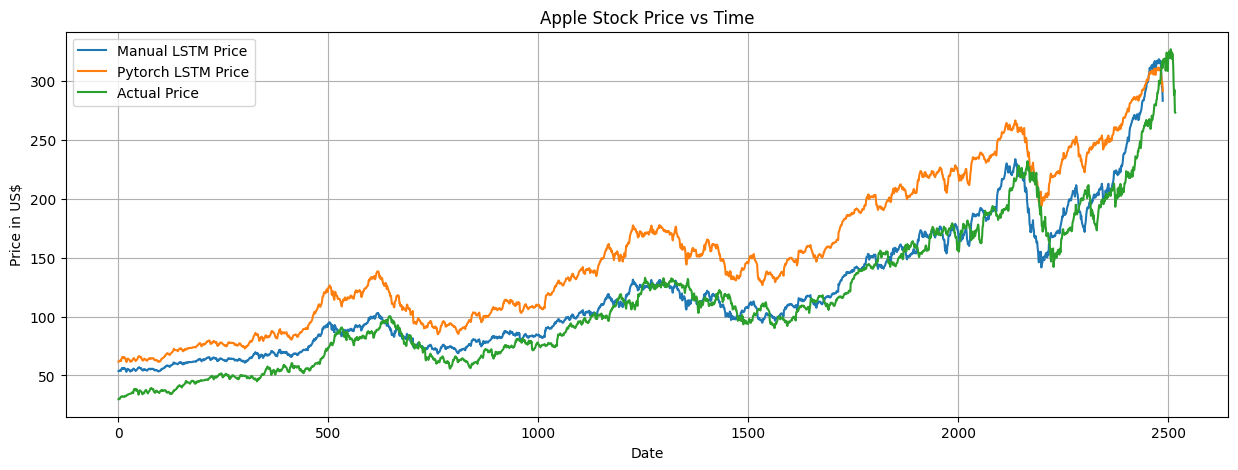

In [120]:
close_val = data['close'].to_numpy()
plt.figure(figsize=(15, 5))
plt.title("Apple Stock Price vs Time")
plt.xlabel("Date")
plt.ylabel("Price in US$")

plt.plot(test_y, label='Manual LSTM Price')
plt.plot(test_y_auto, label='Pytorch LSTM Price')
plt.plot(close_val, label='Actual Price')

plt.legend()
plt.grid(True)
plt.show()